## Binary Classification: Pima Indians Diabetes Dataset
https://archive.ics.uci.edu/ml/datasets/pima+indians+diabetes

** Dataset Information: **

Selected medical exams from a large database (total 768 cases) for females at least 21 years old of Pima Indian heritage.

** Attribute Information: (8 features and 1 class)**

1. Number of times pregnant 
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test 
3. Diastolic blood pressure (mm Hg) 
4. Triceps skin fold thickness (mm) 
5. 2-Hour serum insulin (mu U/ml) 
6. Body mass index (weight in kg/(height in m)^2) 
7. Diabetes pedigree function 
8. Age (years) 
9. Class variable (0 or 1) 

** Objective of this project **

predict whether a patient has diabetes (class; 0 or 1) based on diagnostic variables (features)

## Data

In [1]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

In [2]:
df = pd.read_csv('pima-indians-diabetes.data.csv', index_col=0)

In [3]:
# Inspect Data
df.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1


In [4]:
df.shape

(768, 9)

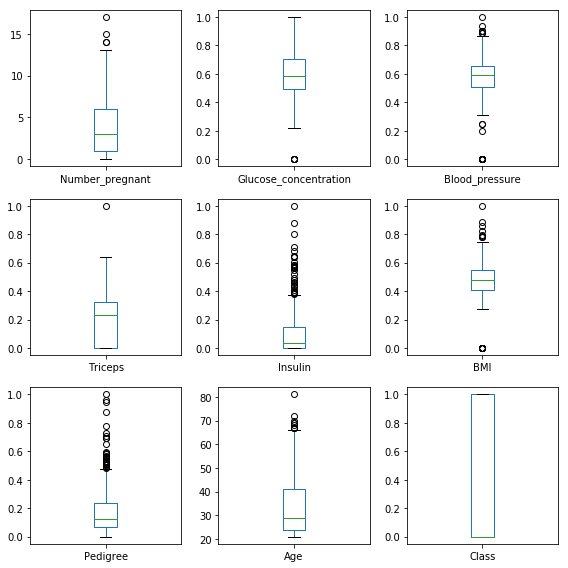

In [5]:
_ = df.plot(kind='box',subplots=True,layout=(3,3),figsize=(8,8))
plt.tight_layout()

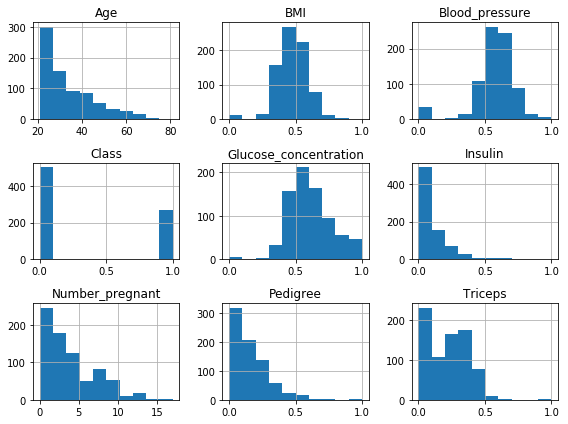

In [6]:
_ = df.hist(figsize=(8,6))
plt.tight_layout()

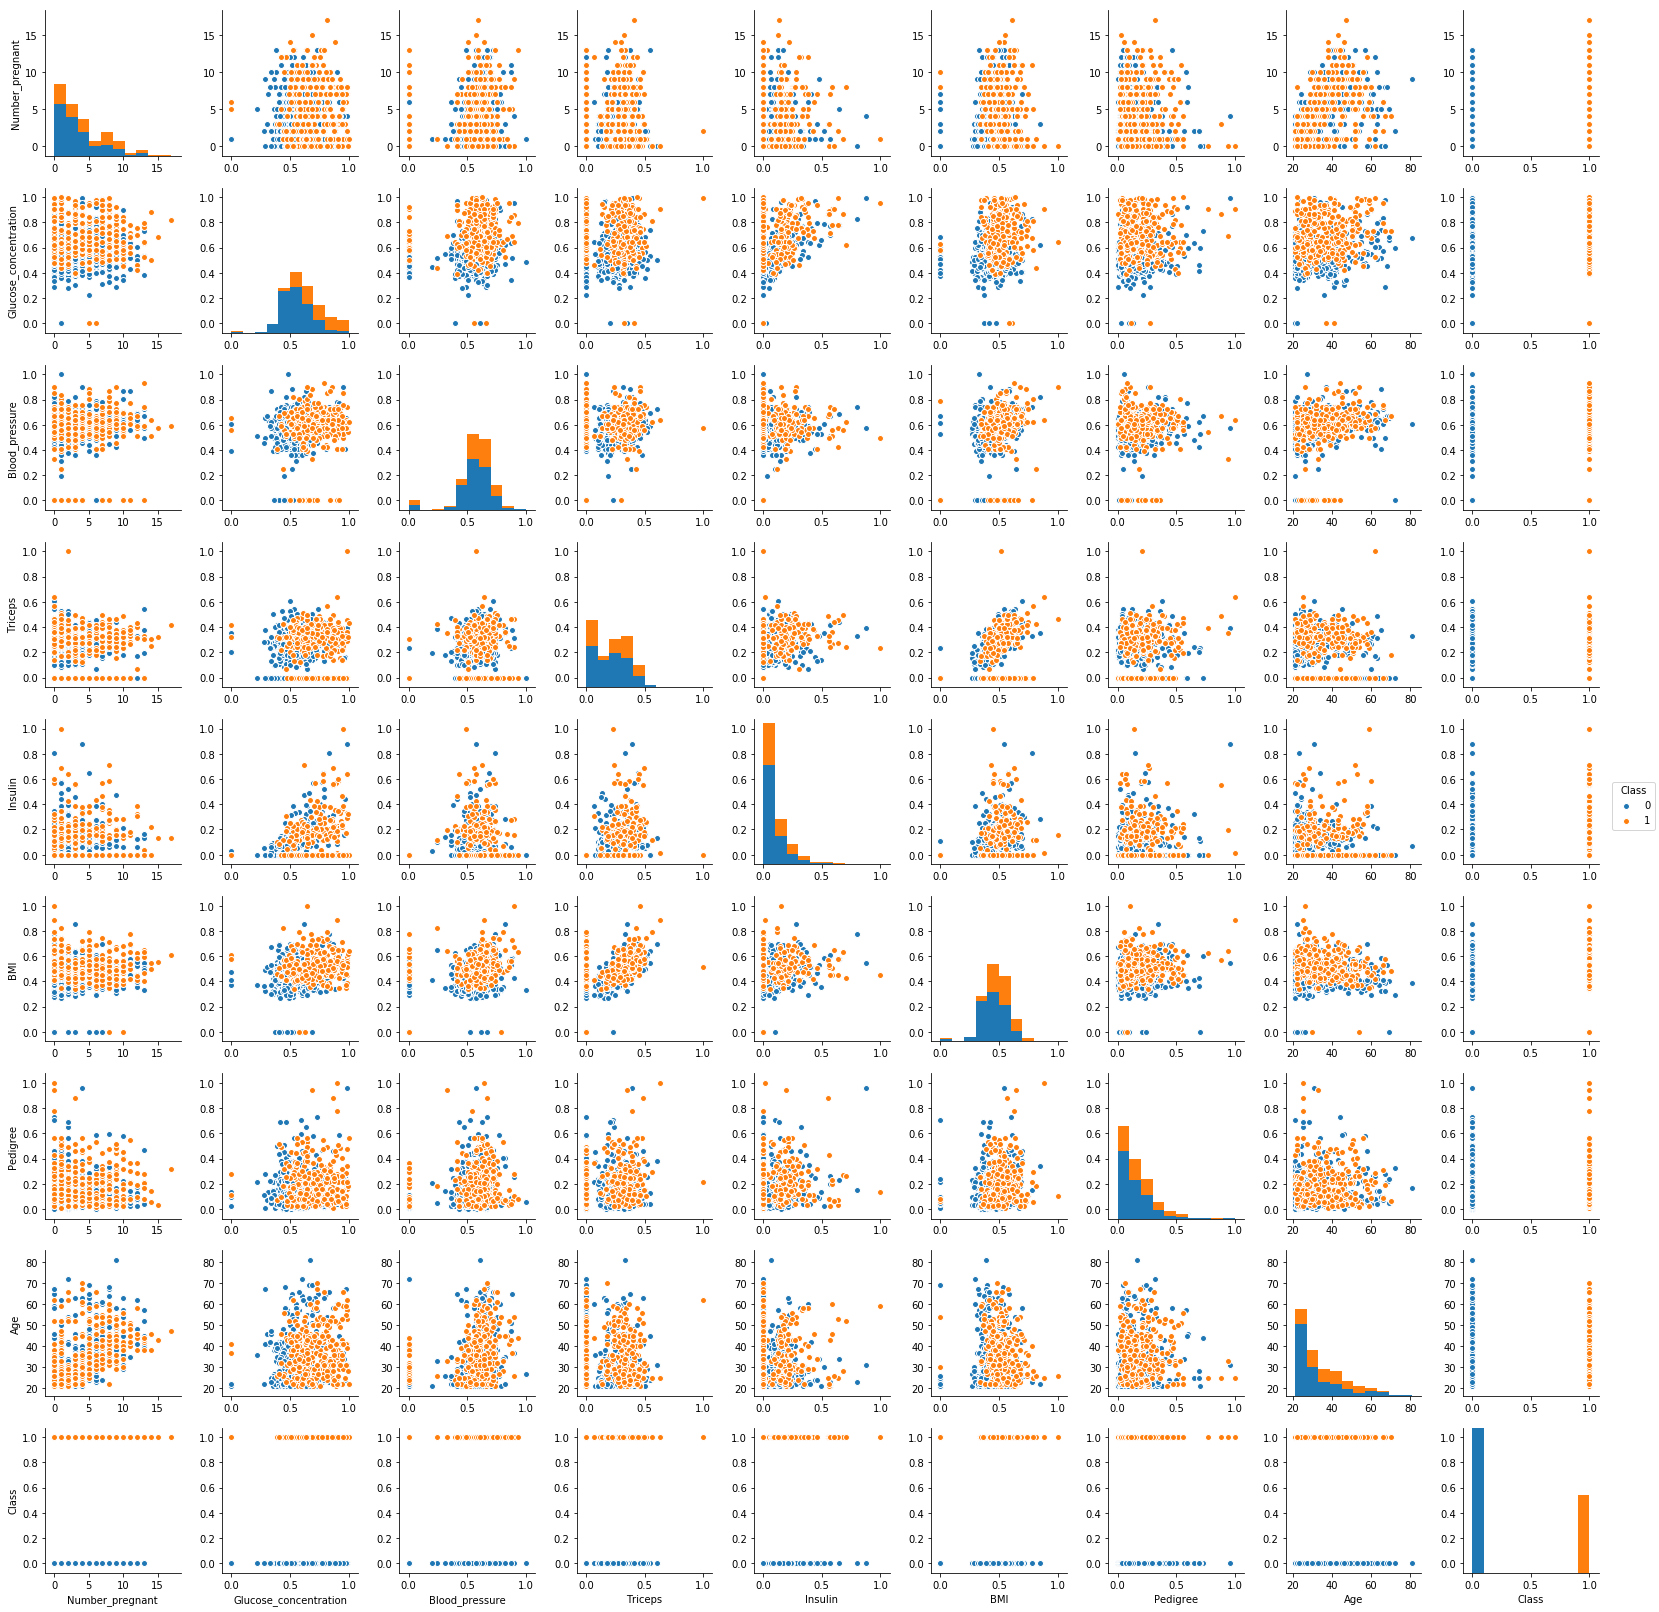

In [7]:
sns.pairplot(df, hue='Class')

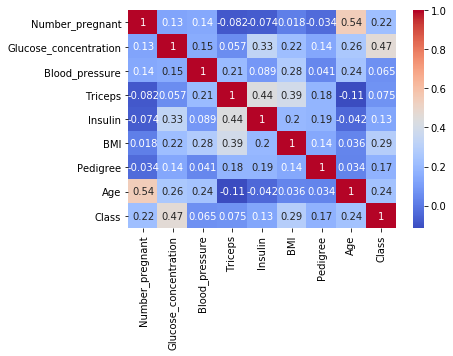

In [8]:
sns.heatmap(df.corr(), annot = True, cmap='coolwarm')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
Number_pregnant          768 non-null int64
Glucose_concentration    768 non-null float64
Blood_pressure           768 non-null float64
Triceps                  768 non-null float64
Insulin                  768 non-null float64
BMI                      768 non-null float64
Pedigree                 768 non-null float64
Age                      768 non-null int64
Class                    768 non-null int64
dtypes: float64(6), int64(3)
memory usage: 80.0 KB


In [10]:
df.describe()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,0.607510,0.566438,0.207439,0.094326,0.476790,0.168179,33.240885,0.348958
std,3.369578,0.160666,0.158654,0.161134,0.136222,0.117499,0.141473,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000
25%,1.000000,0.497487,0.508197,0.000000,0.000000,0.406855,0.070773,24.000000,0.000000
50%,3.000000,0.587940,0.590164,0.232323,0.036052,0.476900,0.125747,29.000000,0.000000
75%,6.000000,0.704774,0.655738,0.323232,0.150414,0.545455,0.234095,41.000000,1.000000
max,17.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,81.000000,1.000000


In [11]:
df['Class'].value_counts() #imbalanced classes-->stratify

0    500
1    268
Name: Class, dtype: int64

In [12]:
df.isnull().sum()

Number_pregnant          0
Glucose_concentration    0
Blood_pressure           0
Triceps                  0
Insulin                  0
BMI                      0
Pedigree                 0
Age                      0
Class                    0
dtype: int64

## Data preprocessing

In [13]:
seed = 123 #random seed for reproducibility
np.random.seed(seed)

** Split Features & Class (or target) **

In [14]:
X = df.drop('Class', axis=1).values
y = df['Class'].values
print(X.shape,y.shape)

(768, 8) (768,)


** Split Train Test Sets **

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    stratify=y, random_state=seed)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(614, 8) (154, 8) (614,) (154,)


In [16]:
np.unique(y_train,return_counts=True) #similar ratio to original class

(array([0, 1], dtype=int64), array([400, 214], dtype=int64))

** Scale features **

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Baseline Model

In [18]:
# Import libraries
from sklearn.model_selection import StratifiedKFold,cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import (RandomForestClassifier,BaggingClassifier,                              
                              AdaBoostClassifier,GradientBoostingClassifier,
                              VotingClassifier)
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score,accuracy_score,confusion_matrix,classification_report

In [67]:
# Define models
def baseline_models():
    models = []
    #linear
    models.append(('LR', LogisticRegression()))
    models.append(('LDA', LinearDiscriminantAnalysis()))
    #non-linear
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('NB', GaussianNB()))
    models.append(('DT', DecisionTreeClassifier()))
    models.append(('SVM', SVC()))
    #ensemble
    models.append(('RF', RandomForestClassifier(n_estimators=100,random_state=seed)))
    models.append(('Bag', BaggingClassifier(n_estimators=100,random_state=seed)))
    models.append(('Ada', AdaBoostClassifier(n_estimators=100,random_state=seed)))
    models.append(('GB', GradientBoostingClassifier(random_state=seed)))
    models.append(('XGB', XGBClassifier(random_state=seed)))
    #Voting Ensemble
    estimators = []
    estimators.append(('LR', LogisticRegression()))
    estimators.append(('DT', DecisionTreeClassifier()))
    estimators.append(('SVM', SVC()))
    models.append(('Vot', VotingClassifier(estimators)))
    return models

In [68]:
# cross validation
def cv_models(models=baseline_models(), X=X_train, y=y_train, n_splits=10, scoring='accuracy'):
    
    np.random.seed(seed)
    pd.options.display.float_format = '{:,.3f}'.format
    
    #cv
    names = []
    results = []
    kfold = StratifiedKFold(n_splits=n_splits, random_state=seed)
    for name,model in models:
        results.append(cross_val_score(model, X, y,cv=kfold, scoring=scoring)*100)                            
        names.append(name)
        
    #sort results by mean acc.
    cv_results = pd.DataFrame(data=results, index=names)
    cv_results['acc_mean(%)'] = cv_results.iloc[:,:n_splits].mean(axis=1)
    cv_results['acc_std(%)'] = cv_results.iloc[:,:n_splits].std(axis=1)
    cv_results.sort_values(by=['acc_mean(%)','acc_std(%)'],ascending=False, inplace=True)
    print(cv_results[['acc_mean(%)','acc_std(%)']])
    
    # visualize results
    plt.figure(figsize=(10,5))
    ax = sns.boxplot(data=cv_results.iloc[:,:n_splits].T)
    ax.set_xticklabels(cv_results.index)
    plt.title('Model Comparison')
    plt.ylabel('Accuracy(%)') 
    
    return cv_results

     acc_mean(%)  acc_std(%)
Vot       77.345       4.647
LR        77.179       4.572
LDA       76.684       5.426
SVM       76.367       4.716
GB        75.891       4.744
NB        75.730       4.256
RF        75.399       4.510
XGB       74.915       4.620
Ada       74.085       6.517
KNN       73.763       2.760
Bag       73.609       4.016
DT        70.653       7.699


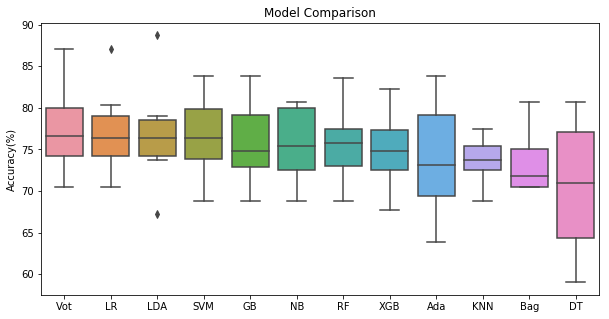

In [72]:
cv_results = cv_models(models=baseline_models(), X=X_train, y=y_train, 
                       n_splits=10, scoring='accuracy')

## Parameter Tuning
Top 5 algorithms:  Vot, LR, LDA, SVM, GB

In [32]:
# define functions for grid search
scoring = 'accuracy'
kfold = StratifiedKFold(n_splits=10, random_state=seed)

def default_model_perfomance(model):
    cv = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)*100
    print(model.get_params())
    print('\nAccuracy of train set: {:0.1f} ({:0.1f})%'.format(cv.mean(), cv.std()))

def best_model_performance(model,param_grid):
    # grid search
    np.random.seed(seed)
    grid_search = GridSearchCV(model, param_grid=param_grid, cv=kfold, verbose=1, scoring=scoring)
    grid_result = grid_search.fit(X_train,y_train)

    # results
    means = grid_result.cv_results_['mean_test_score']*100
    stds = grid_result.cv_results_['std_test_score']*100
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%.3f (%.3f)%% with: %r" % (mean, stdev, param))

    # best
    print("\nBest accuracy of train set: %.1f%% using %s" % (grid_result.best_score_*100, grid_result.best_params_))

#### Model 1 : Voting Ensemble

In [35]:
# Default
estimators = [('LR', LogisticRegression()),
              ('DT', DecisionTreeClassifier()),
              ('SVM', SVC())]
model = VotingClassifier(estimators)
default_model_perfomance(model)

{'estimators': [('LR', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('DT', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')), ('SVM', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'flatten_transform': None, 'n_jobs': 1, 'voting': 'hard', 'weights': None, 'LR': LogisticRegression(C=1.0, class_we

#### Model 2: Logistic Regression

In [33]:
# Default
model = LogisticRegression()
default_model_perfomance(model)

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 100, 'multi_class': 'ovr', 'n_jobs': 1, 'penalty': 'l2', 'random_state': None, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

Accuracy of train set: 77.2 (4.3)%


In [34]:
# Grid Search
model = LogisticRegression()
# parameters
penalty = ['l1','l2'] 
C = [1.0, 0.5, 0.2, 0.1, 0.05, 0.01]
param_grid = dict(penalty=penalty, C=C)
best_model_performance(model,param_grid)

Fitting 10 folds for each of 12 candidates, totalling 120 fits
77.199 (4.343)% with: {'C': 1.0, 'penalty': 'l1'}
77.199 (4.343)% with: {'C': 1.0, 'penalty': 'l2'}
77.199 (4.343)% with: {'C': 0.5, 'penalty': 'l1'}
77.199 (4.343)% with: {'C': 0.5, 'penalty': 'l2'}
76.710 (4.714)% with: {'C': 0.2, 'penalty': 'l1'}
77.199 (4.419)% with: {'C': 0.2, 'penalty': 'l2'}
76.384 (5.037)% with: {'C': 0.1, 'penalty': 'l1'}
76.873 (4.342)% with: {'C': 0.1, 'penalty': 'l2'}
77.199 (4.875)% with: {'C': 0.05, 'penalty': 'l1'}
77.199 (4.265)% with: {'C': 0.05, 'penalty': 'l2'}
70.521 (7.361)% with: {'C': 0.01, 'penalty': 'l1'}
75.407 (5.187)% with: {'C': 0.01, 'penalty': 'l2'}

Best accuracy of train set: 77.2% using {'C': 1.0, 'penalty': 'l1'}


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.2s finished


#### Model 3: Linear Discriminant Analysis

In [36]:
# Default
model = LinearDiscriminantAnalysis()
default_model_perfomance(model)

{'n_components': None, 'priors': None, 'shrinkage': None, 'solver': 'svd', 'store_covariance': False, 'tol': 0.0001}

Accuracy of train set: 76.7 (5.1)%


In [37]:
# Grid Search
model = LinearDiscriminantAnalysis()
shrinkage = [0, 0.2, 0.4, 0.6, 0.8, 0.9, 1.0]
param_grid = [dict(solver=['svd']),dict(solver=['lsqr'], shrinkage=shrinkage)]
best_model_performance(model,param_grid)

Fitting 10 folds for each of 8 candidates, totalling 80 fits
76.710 (5.156)% with: {'solver': 'svd'}
76.710 (5.156)% with: {'shrinkage': 0, 'solver': 'lsqr'}
76.873 (4.738)% with: {'shrinkage': 0.2, 'solver': 'lsqr'}
76.384 (5.245)% with: {'shrinkage': 0.4, 'solver': 'lsqr'}
75.896 (4.669)% with: {'shrinkage': 0.6, 'solver': 'lsqr'}
75.244 (4.012)% with: {'shrinkage': 0.8, 'solver': 'lsqr'}
74.430 (4.524)% with: {'shrinkage': 0.9, 'solver': 'lsqr'}
74.104 (4.248)% with: {'shrinkage': 1.0, 'solver': 'lsqr'}

Best accuracy of train set: 76.9% using {'shrinkage': 0.2, 'solver': 'lsqr'}


[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.1s finished


#### Model 4: Support Vector Machine

In [38]:
# Default
model = SVC(kernel='rbf')
default_model_perfomance(model)

{'C': 1.0, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'auto', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}

Accuracy of train set: 76.4 (4.5)%


In [58]:
# Grid Search
model = SVC(kernel='rbf')
C = [0.01, 0.1, 1, 5, 10]
gamma = [0.001, 0.005, 0.02, 0.05, 0.1, 1, 10]
param_grid = dict(gamma=gamma, C=C)
best_model_performance(model,param_grid)

Fitting 10 folds for each of 35 candidates, totalling 350 fits
65.147 (0.519)% with: {'C': 0.01, 'gamma': 0.001}
65.147 (0.519)% with: {'C': 0.01, 'gamma': 0.005}
65.147 (0.519)% with: {'C': 0.01, 'gamma': 0.02}
65.147 (0.519)% with: {'C': 0.01, 'gamma': 0.05}
65.147 (0.519)% with: {'C': 0.01, 'gamma': 0.1}
65.147 (0.519)% with: {'C': 0.01, 'gamma': 1}
65.147 (0.519)% with: {'C': 0.01, 'gamma': 10}
65.147 (0.519)% with: {'C': 0.1, 'gamma': 0.001}
65.147 (0.519)% with: {'C': 0.1, 'gamma': 0.005}
66.775 (2.132)% with: {'C': 0.1, 'gamma': 0.02}
75.407 (3.625)% with: {'C': 0.1, 'gamma': 0.05}
73.779 (3.153)% with: {'C': 0.1, 'gamma': 0.1}
65.147 (0.519)% with: {'C': 0.1, 'gamma': 1}
65.147 (0.519)% with: {'C': 0.1, 'gamma': 10}
65.147 (0.519)% with: {'C': 1, 'gamma': 0.001}
77.687 (3.668)% with: {'C': 1, 'gamma': 0.005}
77.199 (4.570)% with: {'C': 1, 'gamma': 0.02}
77.036 (4.752)% with: {'C': 1, 'gamma': 0.05}
76.547 (4.143)% with: {'C': 1, 'gamma': 0.1}
69.707 (3.828)% with: {'C': 1, 'gam

[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    5.6s finished


#### Model 5: Gradient Boosting

In [44]:
# Default
model = GradientBoostingClassifier(n_estimators=100,random_state=seed)
default_model_perfomance(model)

{'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'presort': 'auto', 'random_state': 123, 'subsample': 1.0, 'verbose': 0, 'warm_start': False}

Accuracy of train set: 75.9 (4.5)%


In [50]:
# Grid Search
model = GradientBoostingClassifier(random_state=seed)
learning_rate = [0.1] #0.001, 0.01, 0.1, 1]
n_estimators = [100] #,200, 300]
max_depth = [3] #2,3,4,6,8]
subsample = [0.01, 0.1, 1]
param_grid = dict(n_estimators=n_estimators,
                  learning_rate=learning_rate,
                  max_depth=max_depth,
                  subsample=subsample)
best_model_performance(model,param_grid)

Fitting 10 folds for each of 3 candidates, totalling 30 fits
58.143 (11.063)% with: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.01}
71.661 (3.464)% with: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.1}
75.896 (4.500)% with: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1}

Best accuracy of train set: 75.9% using {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1}


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    1.8s finished


## Final Model: Support Vector Machine

** Params: C=10, gamma=0.001 **

In [59]:
model = SVC(C=10, kernel='rbf', gamma=0.001)
model.fit(X_train, y_train)
accuracy = model.score(X_train, y_train)
print('Accuracy of train set: {:0.1f}%'.format(accuracy*100))

Accuracy of train set: 78.3%


** Save and load the final model **

In [60]:
#save model to disk
import pickle
filename='model.sav'
pickle.dump(model, open(filename, 'wb'))

In [61]:
#load the model from disk
model = pickle.load(open(filename,'rb'))
accuracy = model.score(X_train, y_train)
print('Accuracy of train set: {:0.1f}%'.format(accuracy*100))

Accuracy of train set: 78.3%


** Classification report & Confusion Matrix **

In [62]:
def model_evaluate(X=X_train, y_true=y_train):
    # make predictions
    y_pred =  model.predict(X)
    print('Accuracy:\t{:0.1f}%'.format(accuracy_score(y_true,y_pred)*100))
    print('roc auc:\t{:0.3f}'.format(roc_auc_score(y_true,y_pred)))

    #classification report
    print('\n')
    print(classification_report(y_true, y_pred))

    #confusion matrix
    confmat = confusion_matrix(y_true, y_pred)

    fig, ax = plt.subplots(figsize=(2.5, 2.5))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.tight_layout()

Accuracy:	78.3%
roc auc:	0.726


             precision    recall  f1-score   support

          0       0.79      0.92      0.85       400
          1       0.77      0.54      0.63       214

avg / total       0.78      0.78      0.77       614



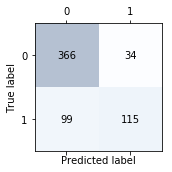

In [63]:
model_evaluate(X=X_train, y_true=y_train)

## Model Evaluation with Test set

Accuracy:	76.6%
roc auc:	0.701


             precision    recall  f1-score   support

          0       0.77      0.92      0.84       100
          1       0.76      0.48      0.59        54

avg / total       0.77      0.77      0.75       154



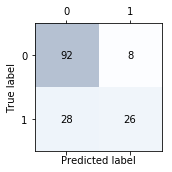

In [64]:
model_evaluate(X=X_test, y_true=y_test)

## Summary

Best model: ** Support Vector Machine ** w/ C=10 and gamma=0.001

Accuracy of test set: ** 76.6% **